<a href="https://colab.research.google.com/github/Emma-Cap/Deep-Learning-Project/blob/main/Simplified_coco2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
import zipfile
import os

# Monta Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Controllare il contenuto della directory MyDrive
drive_path = "/content/drive/MyDrive"
print("Contenuto di MyDrive:")
print(os.listdir(drive_path))


Contenuto di MyDrive:
['Colab Notebooks', '.ipynb_checkpoints', 'simplified_dataset_finale (1).zip', 'simplified_dataset_finale.zip']


In [10]:
# Percorso del file ZIP
zip_file_path = "/content/drive/MyDrive/simplified_dataset_finale.zip"

# Percorso della directory di estrazione
extracted_dir = "/content/simplified_dataset_finale"
os.makedirs(extracted_dir, exist_ok=True)

# Estrai il file ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

print(f"File estratti nella directory: {extracted_dir}")




File estratti nella directory: /content/simplified_dataset_finale


In [11]:
# Controlla la struttura della directory estratta
print("Contenuto della directory estratta:")
print(os.listdir(extracted_dir))


Contenuto della directory estratta:
['images', 'annotations.json']


In [12]:
import json

# Carica il file delle annotazioni
annotations_path = "/content/simplified_dataset_finale/annotations.json"
with open(annotations_path, 'r') as f:
    annotations = json.load(f)

# Calcolo dei numeri principali
num_images = len(annotations['images'])
num_annotations = len(annotations['annotations'])
num_categories = len(annotations['categories'])

print(f"Numero di immagini: {num_images}")
print(f"Numero di annotazioni: {num_annotations}")
print(f"Numero di categorie: {num_categories}")


Numero di immagini: 9000
Numero di annotazioni: 9000
Numero di categorie: 10


In [13]:
# Esplora le categorie
print("Categorie presenti nel dataset:")
for category in annotations['categories']:
    print(f"- ID: {category['id']}, Nome: {category['name']}")


Categorie presenti nel dataset:
- ID: 1, Nome: person
- ID: 3, Nome: car
- ID: 10, Nome: traffic light
- ID: 31, Nome: handbag
- ID: 44, Nome: bottle
- ID: 47, Nome: cup
- ID: 51, Nome: bowl
- ID: 62, Nome: chair
- ID: 67, Nome: dining table
- ID: 84, Nome: book


In [22]:
# Trova categorie non definite
all_category_ids = set([ann['category_id'] for ann in annotations['annotations']])
defined_category_ids = set([cat['id'] for cat in annotations['categories']])

# Categorie presenti nelle annotazioni ma non definite
undefined_categories = all_category_ids - defined_category_ids
print(f"Categorie non definite: {undefined_categories}")

# Filtra le annotazioni per categorie definite
filtered_annotations = [
    ann for ann in annotations['annotations']
    if ann['category_id'] in defined_category_ids
]

# Aggiorna il conteggio delle annotazioni per categoria
from collections import Counter
category_counts = Counter([ann['category_id'] for ann in filtered_annotations])

# Genera nomi e valori per le categorie
category_names = [id_to_name[cat_id] for cat_id in category_counts.keys()]
category_values = list(category_counts.values())



Categorie non definite: {2, 4, 5, 6, 7, 8, 9, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 46, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85, 86, 87, 88, 89, 90}


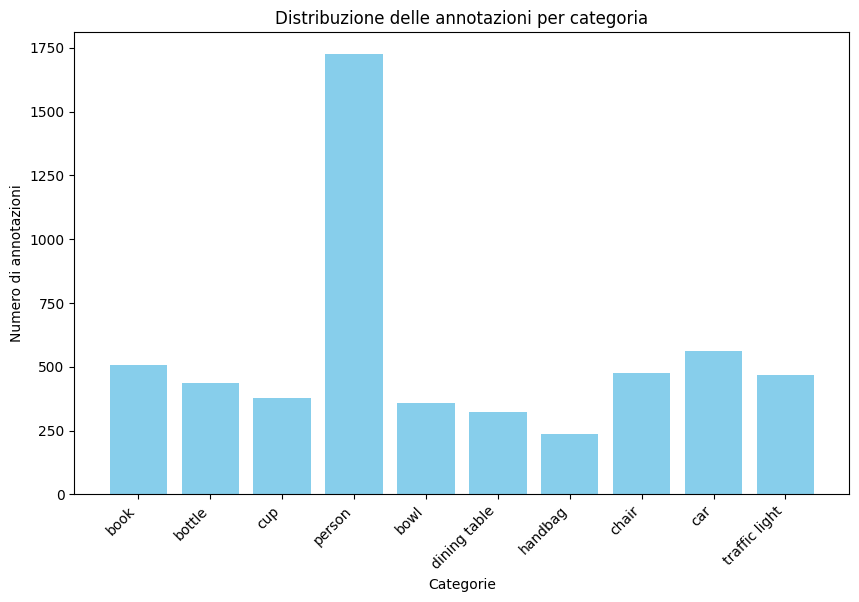

In [23]:
# Gestione delle categorie mancanti
id_to_name = {cat['id']: cat['name'] for cat in annotations['categories']}
id_to_name.update({cat_id: "Categoria sconosciuta" for cat_id in undefined_categories})

# Genera i dati per il grafico
category_names = [id_to_name[cat_id] for cat_id in category_counts.keys()]
category_values = list(category_counts.values())

# Grafico a barre
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(category_names, category_values, color='skyblue')
plt.title("Distribuzione delle annotazioni per categoria")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Categorie")
plt.ylabel("Numero di annotazioni")
plt.show()


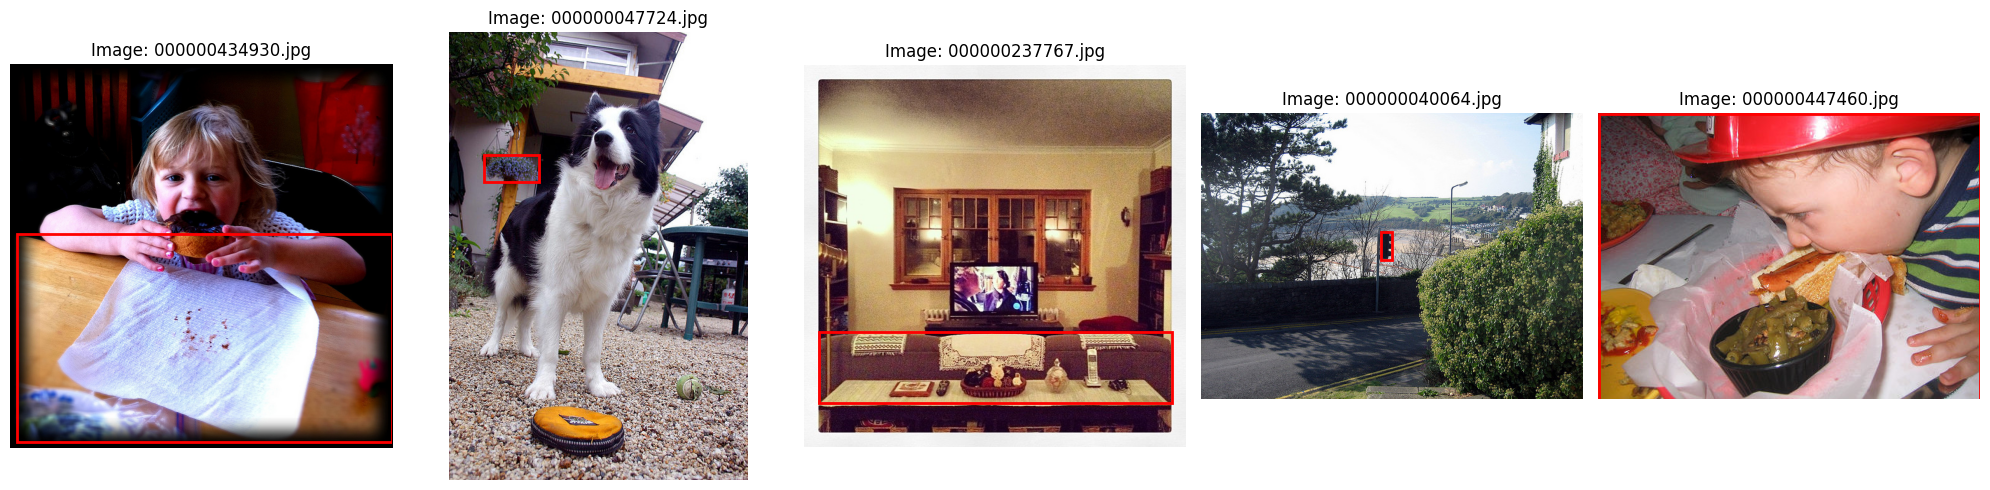

In [15]:
import matplotlib.patches as patches
from PIL import Image
import random

# Percorso delle immagini
images_dir = "/content/simplified_dataset_finale/images"

# Seleziona alcune immagini casuali
sample_images = random.sample(annotations['images'], 5)

# Visualizza le immagini con bounding boxes
fig, axes = plt.subplots(1, len(sample_images), figsize=(20, 5))

for i, img_info in enumerate(sample_images):
    img_path = os.path.join(images_dir, img_info['file_name'])
    img = Image.open(img_path)

    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(f"Image: {img_info['file_name']}")

    # Disegna i bounding boxes
    for ann in [a for a in annotations['annotations'] if a['image_id'] == img_info['id']]:
        x, y, width, height = ann['bbox']
        rect = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor='r', facecolor='none')
        axes[i].add_patch(rect)

plt.tight_layout()
plt.show()


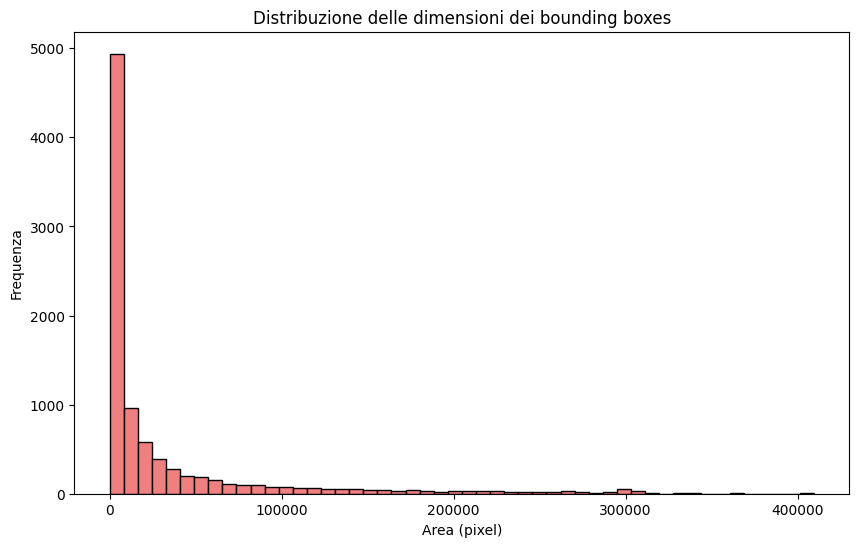

In [16]:
# Calcola le aree dei bounding boxes
bbox_areas = [ann['bbox'][2] * ann['bbox'][3] for ann in annotations['annotations']]

# Visualizza un istogramma delle aree
plt.figure(figsize=(10, 6))
plt.hist(bbox_areas, bins=50, color='lightcoral', edgecolor='black')
plt.title("Distribuzione delle dimensioni dei bounding boxes")
plt.xlabel("Area (pixel)")
plt.ylabel("Frequenza")
plt.show()


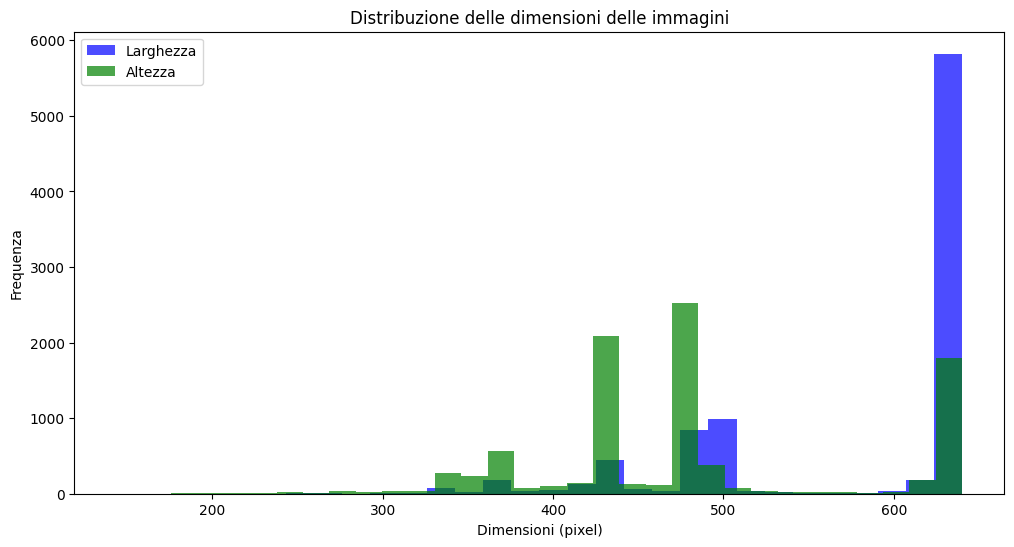

In [17]:
# Estrai le dimensioni delle immagini
image_sizes = [(img['width'], img['height']) for img in annotations['images']]
widths, heights = zip(*image_sizes)

# Grafico
plt.figure(figsize=(12, 6))
plt.hist(widths, bins=30, alpha=0.7, label="Larghezza", color='blue')
plt.hist(heights, bins=30, alpha=0.7, label="Altezza", color='green')
plt.title("Distribuzione delle dimensioni delle immagini")
plt.xlabel("Dimensioni (pixel)")
plt.ylabel("Frequenza")
plt.legend()
plt.show()


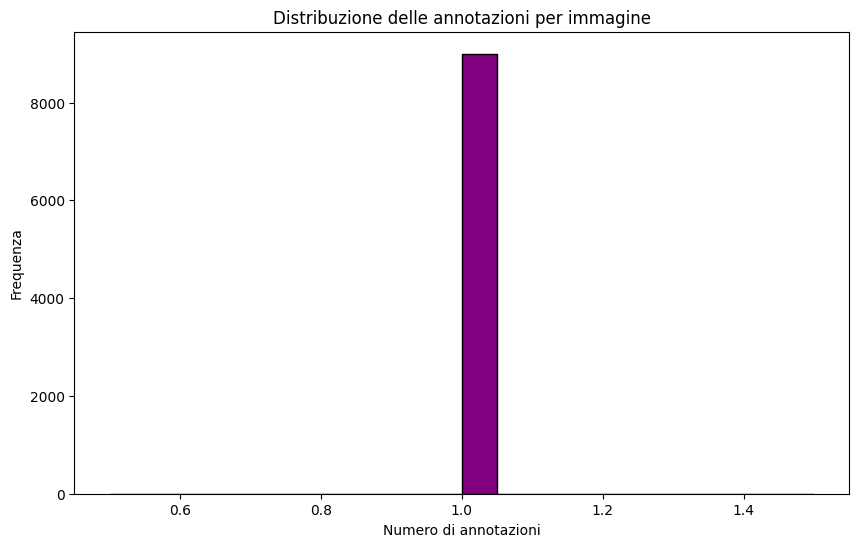

In [19]:
# Conta il numero di annotazioni per immagine
image_annotation_count = Counter([ann['image_id'] for ann in annotations['annotations']])

# Visualizza la distribuzione
plt.figure(figsize=(10, 6))
plt.hist(image_annotation_count.values(), bins=20, color='purple', edgecolor='black')
plt.title("Distribuzione delle annotazioni per immagine")
plt.xlabel("Numero di annotazioni")
plt.ylabel("Frequenza")
plt.show()



Numero di immagini per la categoria 'person': 1725


<ipython-input-20-e6514cbd2c0a>:11: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sample_image_ids = random.sample(image_ids, min(len(image_ids), 5))


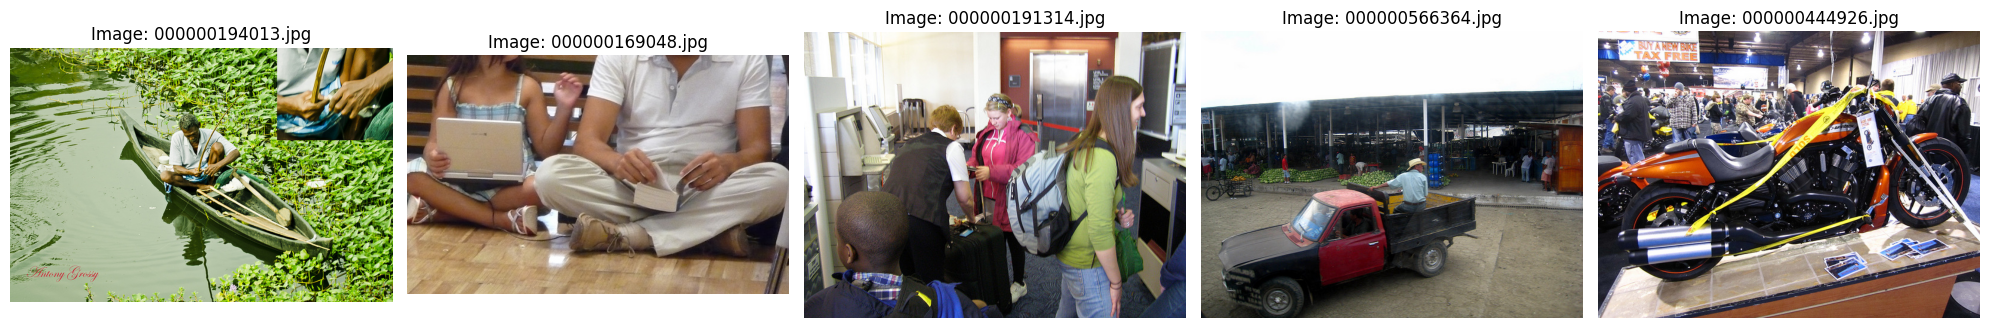

In [20]:
# ID di una categoria specifica
selected_category_id = annotations['categories'][0]['id']  # Puoi modificare l'ID
selected_category_name = id_to_name[selected_category_id]

# Trova immagini per questa categoria
image_ids = {ann['image_id'] for ann in annotations['annotations'] if ann['category_id'] == selected_category_id}

print(f"Numero di immagini per la categoria '{selected_category_name}': {len(image_ids)}")

# Visualizza alcune immagini
sample_image_ids = random.sample(image_ids, min(len(image_ids), 5))
fig, axes = plt.subplots(1, len(sample_image_ids), figsize=(20, 5))

for i, img_id in enumerate(sample_image_ids):
    img_info = next(img for img in annotations['images'] if img['id'] == img_id)
    img_path = os.path.join(images_dir, img_info['file_name'])
    img = Image.open(img_path)

    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(f"Image: {img_info['file_name']}")

plt.tight_layout()
plt.show()
